# Pneumonia Data Wrangling & EDA

## Import Relevant Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import scipy.ndimage as ndi

## Import Data & Label

In [2]:
# Create function to import images from folders
labels = ['NORMAL', 'PNEUMONIA']
img_size = 150
def load_images(folder):
    images = []
    for label in labels: 
        path = os.path.join(folder, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshape images to preferred size
                images.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(images, dtype=object)

In [3]:
train = load_images('Raw_Data/train')
test = load_images('Raw_Data/test')
val = load_images('Raw_Data/val')

## Explore Data

In [4]:
total_shape = train.shape[0] + test.shape[0] + val.shape[0]
print(total_shape)
print(train.shape[0]/total_shape)
print(test.shape[0]/total_shape)
print(val.shape[0]/total_shape)

5856
0.8907103825136612
0.10655737704918032
0.00273224043715847


There are 5856 images total. Training data accounts for approximately 89.1% of images. Testing data is about 10.7%. Validation data is about 0.273%.

In [5]:
# For each label type print image types and size
print('Image 1 Type & Size')
print('Type: ', train[0][0].dtype)
print('Size: ', train[0][0].size)
print('')

print('Image 5216 Type & Size')
print('Type: ', train[5215][0].dtype)
print('Size: ', train[5215][0].size)

Image 1 Type & Size
Type:  uint8
Size:  22500

Image 5216 Type & Size
Type:  uint8
Size:  22500


Images are uint8 and therefore have a range between 0 and 255. There are 22,500 pixels per image. 

In [6]:
print('Summary Statistics for Training Data')

# Find median pixel for each image
# Then print median of resulting list of image medians
image_median = []
for im in range(5216):
    median = ndi.median(train[im][0])
    image_median.append(median)
print('Pixel Median: ', np.median(image_median))

# Find mean pixel for each image
# Then print mean of resulting list of image means
image_mean = []
for im in range(5216):
    mean = ndi.mean(train[im][0])
    image_mean.append(mean)
print('Pixel Mean: ', np.mean(image_mean))

# Find standard deviation pixel for each image
# Then print mean of resulting list of image standard deviations
image_std = []
for im in range(5216):
    std = ndi.standard_deviation(train[im][0])
    image_std.append(std)
print('Pixel Average Standard Deviation: ', np.mean(image_std))

Summary Statistics for Training Data
Pixel Median:  134.0
Pixel Mean:  122.87857564758009
Pixel Average Standard Deviation:  56.82036104056129


The median pixel shade is 134 and the mean pixel shade is 123. This indicates the majority of pixel shades are towards the middle. The average standard deviation in pixels is 57 showing there is large variability in image pixel shading.

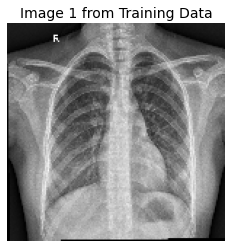

Pneumonia Found:  False



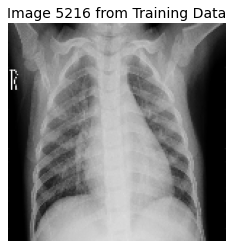

Pneumonia Found:  True


In [7]:
# Show image 1 and print label type
_ = plt.imshow(train[0][0], cmap='gray')
_ = plt.axis('off')
_ = plt.title('Image 1 from Training Data', fontsize=14)
plt.show()
print("Pneumonia Found: ", bool(train[0][1]))
print('')

# Show image 5216 and print label type
_ = plt.imshow(train[5215][0], cmap='gray')
_ = plt.axis('off')
_ = plt.title('Image 5216 from Training Data', fontsize=14)
plt.show()
print("Pneumonia Found: ", bool(train[5215][1]))

Images appear to be centered well but not optimized for intensity.

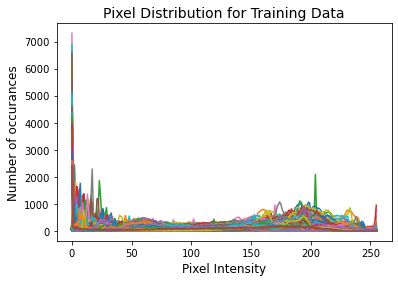

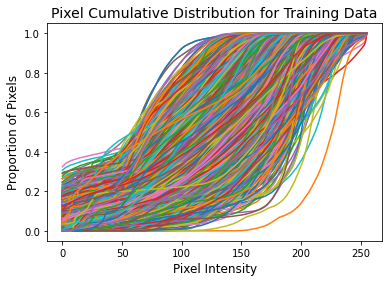

In [8]:
# Show pixel distribution for all images
for im in range(5216):
    hist = ndi.histogram(train[im][0], min=0, max=255, bins=256)
    _ = plt.plot(hist)
_ = plt.title('Pixel Distribution for Training Data', fontsize=14)
_ = plt.xlabel('Pixel Intensity', fontsize=12)
_ = plt.ylabel('Number of occurances', fontsize=12)
plt.show()

# Show cumulative ditribution for all images
for im in range(5216):
    hist = ndi.histogram(train[im][0], min=0, max=255, bins=256)
    cdf = hist.cumsum() / hist.sum()
    _ = plt.plot(cdf)
_ = plt.title('Pixel Cumulative Distribution for Training Data', fontsize=14)
_ = plt.xlabel('Pixel Intensity', fontsize=12)
_ = plt.ylabel('Proportion of Pixels', fontsize=12)
plt.show()

From pixel distribution, the graph indicates the majority of images have a high number of low intensity pixels with a spike at 0 (most likely due to background). Images also have a relatively high number of pixels between 150 and 225.

From the cumulative distribution, the graph indicates there is relatively wide variability between image pixel proportions.

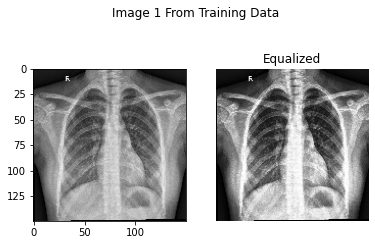

Pneumonia Found:  False


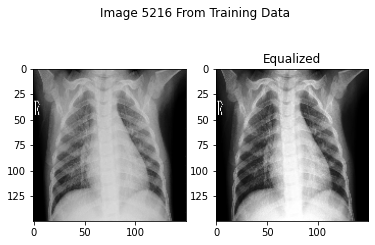

Pneumonia Found:  True


In [9]:
# Equalize image 1
hist1 = ndi.histogram(train[0][0], min=0, max=255, bins=256)
cdf1 = hist1.cumsum() / hist1.sum()
im_equalized1 = cdf1[train[0][0]] * 255

# Show original vs equalized image
fig, axes = plt.subplots(1,2)
for ax in axes:
    plt.axis('off')
axes[0].imshow(train[0][0], cmap='gray')
plt.title('Original')
axes[1].imshow(im_equalized1, cmap='gray')
plt.title('Equalized')
plt.suptitle('Image 1 From Training Data')
plt.show()
print("Pneumonia Found: ", bool(train[0][1]))

# Equalize image 5216
hist5216 = ndi.histogram(train[5215][0], min=0, max=255, bins=256)
cdf5216 = hist5216.cumsum() / hist5216.sum()
im_equalized5216 = cdf5216[train[5215][0]] * 255

# Show original vs equalized image
fig, axes = plt.subplots(1,2)
axes[0].imshow(train[5215][0], cmap='gray')
plt.title('Original')
axes[1].imshow(im_equalized5216, cmap='gray')
plt.title('Equalized')
plt.suptitle('Image 5216 From Training Data')
plt.show()
print("Pneumonia Found: ", bool(train[5215][1]))

The dataset would benefit from equalization before modeling.

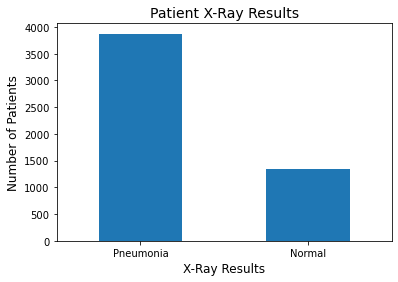

In [10]:
df_train = pd.DataFrame(train)

# Compare number of pneumonia images to normal images
_ = df_train[1].value_counts().plot(kind='bar')
_ = plt.xticks([0,1], ['Pneumonia', 'Normal'], rotation=0)
_ = plt.title('Patient X-Ray Results', fontsize=14)
_ = plt.xlabel('X-Ray Results', fontsize=12)
_ = plt.ylabel('Number of Patients', fontsize=12)

There is a class imbalance in the dataset. The model should be evaluated using F1 score. 

## Export Clean Data

In [11]:
np.save('Clean_Data/training_data.npy', train)
np.save('Clean_Data/testing_data.npy', test)
np.save('Clean_Data/validation_data.npy', val)